## ch4

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div>
<div style="text-align: right"> Initial upload: 2022.08.09 </div> 
<div style="text-align: right"> Last update: 2022.08.09</div> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import datetime
#import missingno as msno
import gc
import warnings; warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

# Options for pandas
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
colors = ["#00798c", "#d1495b", '#edae49', '#66a182', '#4a4a4a',
          '#1a508b', '#e3120b', '#c5a880', '#9F5F80', '#6F9EAF',
          '#0278ae','#F39233', '#A7C5EB', '#54E346', '#ABCE74',
        '#d6b0b1', '#58391c', '#cdd0cb', '#ffb396', '#6930c3']
sns.color_palette(colors)

[(0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.10196078431372549, 0.3137254901960784, 0.5450980392156862),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.7725490196078432, 0.6588235294117647, 0.5019607843137255),
 (0.6235294117647059, 0.37254901960784315, 0.5019607843137255),
 (0.43529411764705883, 0.6196078431372549, 0.6862745098039216),
 (0.00784313725490196, 0.47058823529411764, 0.6823529411764706),
 (0.9529411764705882, 0.5725490196078431, 0.2),
 (0.6549019607843137, 0.7725490196078432, 0.9215686274509803),
 (0.32941176470588235, 0.8901960784313725, 0.27450980392156865),
 (0.6705882352941176, 0.807843137254902, 0.4549019607843137),
 (0.8392156862745098, 0.6901960784313725, 0.6941176470588235),
 (0.34509803921568627, 0.2235294117647059, 0.10980392156862745),
 (0.803921568627451, 0.8156862745098039, 0.796078431372549),
 (1.0, 0.7019607843137254, 0.5882352941176471),
 (0.4117647058823529, 0.18823529411764706, 0.7647058823529411)]

### 1. 데이터 읽기

In [3]:
df = pd.read_csv('lifelog/step_total_merged.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [4]:
df.head()

,timestamp,STEP_CNT,users,year,month,day,hour,dayofweek,season,holiday,temp,rain,wind,wind_d,humidity,snow,cloud
0,2022-02-01 00:00:00,13107,528,2022,2,1,0,1,4,1,0.4,1.2,1.8,270,92,1.8,9
1,2022-02-01 01:00:00,9079,322,2022,2,1,1,1,4,1,-0.2,0.0,2.9,250,85,1.8,2
2,2022-02-01 02:00:00,3294,170,2022,2,1,2,1,4,1,-0.9,0.0,2.8,250,74,1.7,7
3,2022-02-01 03:00:00,2705,128,2022,2,1,3,1,4,1,-0.9,0.0,3.6,250,72,1.7,9
4,2022-02-01 04:00:00,1146,78,2022,2,1,4,1,4,1,-1.7,0.0,3.1,270,87,2.0,10


In [5]:
df.shape

(3840, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840 entries, 0 to 3839
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  3840 non-null   datetime64[ns]
 1   STEP_CNT   3840 non-null   int64         
 2   users      3840 non-null   int64         
 3   year       3840 non-null   int64         
 4   month      3840 non-null   int64         
 5   day        3840 non-null   int64         
 6   hour       3840 non-null   int64         
 7   dayofweek  3840 non-null   int64         
 8   season     3840 non-null   int64         
 9   holiday    3840 non-null   int64         
 10  temp       3840 non-null   float64       
 11  rain       3840 non-null   float64       
 12  wind       3840 non-null   float64       
 13  wind_d     3840 non-null   int64         
 14  humidity   3840 non-null   int64         
 15  snow       3840 non-null   float64       
 16  cloud      3840 non-null   int64         


In [7]:
train = df[df['timestamp']<datetime.datetime(2022, 7, 1)]
test = df[df['timestamp']>datetime.datetime(2022, 7, 1)]

In [8]:
X_train = train.drop(['timestamp','year', 'month', 'day', 'STEP_CNT'], axis = 1)
y_train = train['STEP_CNT']

X_test = test.drop(['timestamp','year', 'month', 'day', 'STEP_CNT'], axis = 1)
y_test = test['STEP_CNT']

In [9]:
X_train

,users,hour,dayofweek,season,holiday,temp,rain,wind,wind_d,humidity,snow,cloud
0,528,0,1,4,1,0.4,1.2,1.8,270,92,1.8,9
1,322,1,1,4,1,-0.2,0.0,2.9,250,85,1.8,2
2,170,2,1,4,1,-0.9,0.0,2.8,250,74,1.7,7
3,128,3,1,4,1,-0.9,0.0,3.6,250,72,1.7,9
4,78,4,1,4,1,-1.7,0.0,3.1,270,87,2.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
3595,8701,19,3,2,0,21.2,2.2,3.2,50,100,0.0,10
3596,8030,20,3,2,0,21.3,2.7,2.9,50,99,0.0,10
3597,7144,21,3,2,0,21.4,1.0,1.9,50,99,0.0,10
3598,5475,22,3,2,0,21.5,1.0,1.5,50,99,0.0,10


In [10]:
import lightgbm as lgb

In [11]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 

In [12]:
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

LGBMRegressor()

In [13]:
pred = model.predict(X_test)
test['STEP_CNT_pred'] = pred

<AxesSubplot:xlabel='timestamp'>

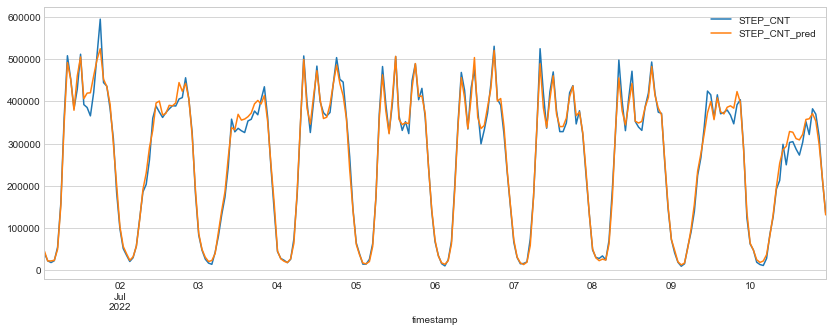

In [14]:
test.set_index('timestamp')[['STEP_CNT', 'STEP_CNT_pred']].plot(figsize=(14, 5))

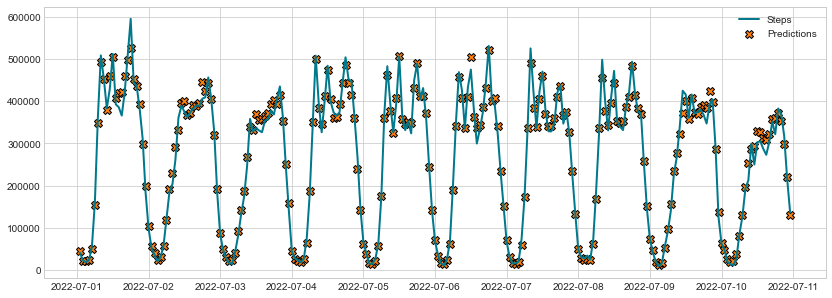

In [15]:
fig, ax = plt.subplots(figsize = (14, 5))

ax.plot(test['timestamp'], test['STEP_CNT'], linewidth = 2, label='Steps', c=colors[0])
ax.scatter(test['timestamp'], test['STEP_CNT_pred'], marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

ax.legend()

In [16]:
MAPE(y_test, pred)

6.543779333537956

In [17]:
train = df[df['timestamp']<datetime.datetime(2022, 7, 1)]
test = df[df['timestamp']>datetime.datetime(2022, 7, 1)]

X_train = train.drop(['timestamp','year', 'month', 'day', 'STEP_CNT', 'users'], axis = 1)
y_train = train['STEP_CNT']

X_test = test.drop(['timestamp','year', 'month', 'day', 'STEP_CNT', 'users'], axis = 1)
y_test = test['STEP_CNT']

In [18]:
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
test['STEP_CNT_pred'] = pred

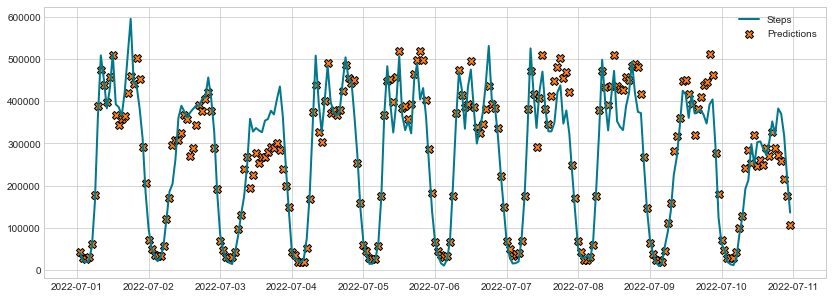

In [19]:
fig, ax = plt.subplots(figsize = (14, 5))

ax.plot(test['timestamp'], test['STEP_CNT'], linewidth = 2, label='Steps', c=colors[0])
ax.scatter(test['timestamp'], test['STEP_CNT_pred'], marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

ax.legend()

In [20]:
MAPE(y_test, pred)

19.54702330878625

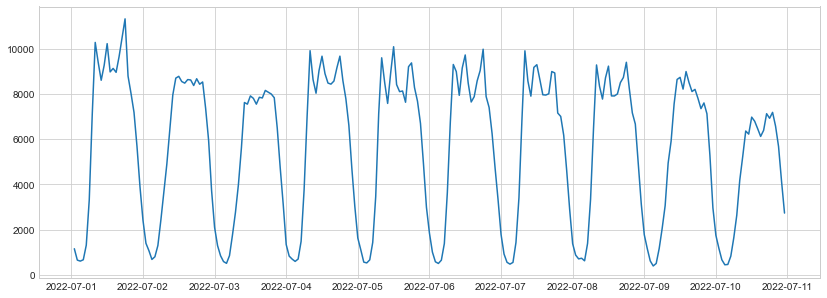

In [21]:
fig, ax = plt.subplots(figsize = (14, 5))
ax.plot(test['timestamp'], test['users'])

<AxesSubplot:>

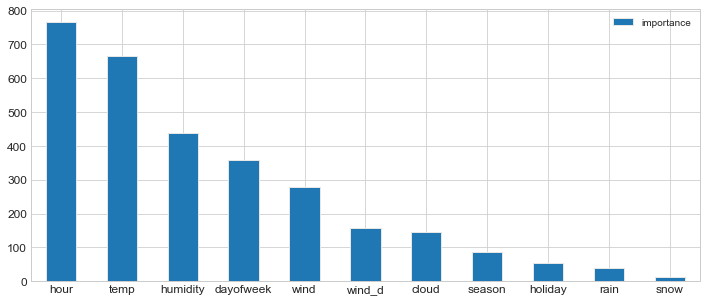

In [22]:
feature_importance = pd.DataFrame(index=model.feature_name_, columns=['importance'])
feature_importance['importance'] = model.feature_importances_ 

feature_importance.sort_values('importance',ascending = False).plot(kind = 'bar', edgecolor='#E6E6E6', figsize = (12, 5),
                                                                   rot= 0, fontsize = 12)

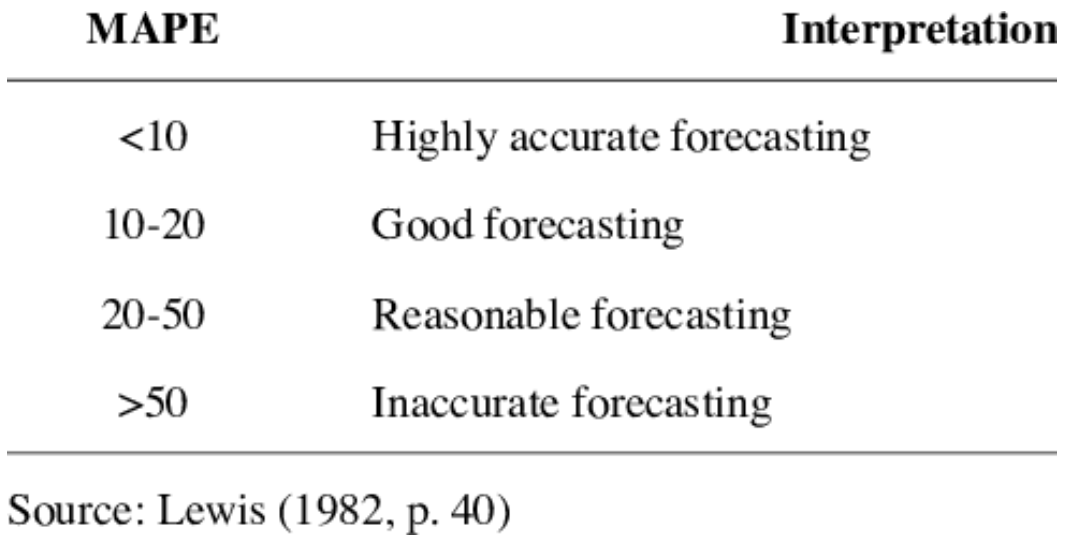